## Загрузка данных и обработка пропусков (по baseline)

In [1]:
import numpy as np
import pandas as pd
import random
pd.set_option('display.float_format', lambda x: '%.4f' % x)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='whitegrid')
sns.set_context("paper", font_scale=1.5)

In [2]:
DATASET_PATH = 'data/train.csv'
TEST_DATASET_PATH = 'data/test.csv'

df_train = pd.read_csv(DATASET_PATH, index_col='Id')
df_test = pd.read_csv(TEST_DATASET_PATH, index_col='Id')

df_train.shape, df_test.shape

((10000, 19), (5000, 18))

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

### Обработка категориальных признаков

In [4]:
df_train['DistrictId'] = df_train['DistrictId'].astype('str')
df_test['DistrictId'] = df_test['DistrictId'].astype('str')

In [5]:
print(df_train['DistrictId'].nunique(), 'уникальных значений')

205 уникальных значений


In [6]:
feature_bin_names = ['Ecology_2', 'Ecology_3', 'Shops_2']

df_train[feature_bin_names] = df_train[feature_bin_names].replace({'A':1, 'B':0})

In [7]:
df_train['Ecology_2'].value_counts()

0    9903
1      97
Name: Ecology_2, dtype: int64

### Обработка пропусков

In [8]:
#LifeSquare

df_train.loc[df_train['LifeSquare'].isna(), 'LifeSquare'] = \
            df_train['Square'] - df_train['KitchenSquare']

df_test.loc[df_test['LifeSquare'].isna(), 'LifeSquare'] = \
            df_test['Square'] - df_test['KitchenSquare']

In [9]:
#Healthcare_1

df_train.loc[df_train['Healthcare_1'].isna(), 'Healthcare_1'] = df_train['Healthcare_1'].median()
df_test.loc[df_test['Healthcare_1'].isna(), 'Healthcare_1'] = df_train['Healthcare_1'].median()

In [10]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,10000.0000,1.8905,0.8395,0.0000,1.0000,2.0000,2.0000,19.0000
Square,10000.0000,56.3158,21.0587,1.1369,41.7749,52.5133,65.9006,641.0652
LifeSquare,10000.0000,41.7995,77.8235,0.3706,25.4942,37.0408,49.8232,7480.5921
KitchenSquare,10000.0000,6.2733,28.5609,0.0000,1.0000,6.0000,9.0000,2014.0000
Floor,10000.0000,8.5267,5.2411,1.0000,4.0000,7.0000,12.0000,42.0000
HouseFloor,10000.0000,12.6094,6.7760,0.0000,9.0000,13.0000,17.0000,117.0000
HouseYear,10000.0000,3990.1663,200500.2614,1910.0000,1974.0000,1977.0000,2001.0000,20052011.0000
Ecology_1,10000.0000,0.1189,0.1190,0.0000,0.0176,0.0754,0.1958,0.5219
Ecology_2,10000.0000,0.0097,0.0980,0.0000,0.0000,0.0000,0.0000,1.0000
Ecology_3,10000.0000,0.0275,0.1635,0.0000,0.0000,0.0000,0.0000,1.0000


### Обработка выбросов

Rooms

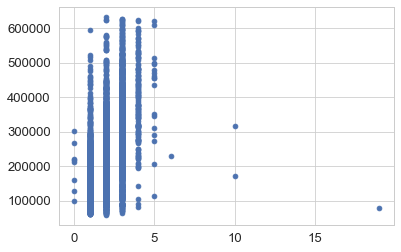

In [11]:
plt.scatter(df_train['Rooms'], df_train['Price'])
plt.show()

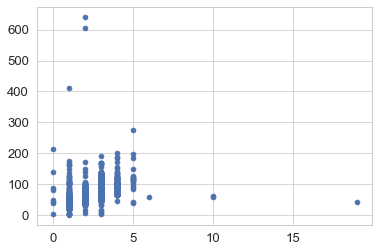

In [12]:
plt.scatter(df_train['Rooms'], df_train['Square'])
plt.show()

In [13]:
df_train.loc[(df_train['Rooms'] > 5) | (df_train['Rooms'] == 0), 'Rooms'] = df_train['Rooms'].mode()[0]
df_test.loc[(df_test['Rooms'] > 5) | (df_test['Rooms'] == 0), 'Rooms'] = df_train['Rooms'].mode()[0]


Square, LifeSquare, KitchenSquare

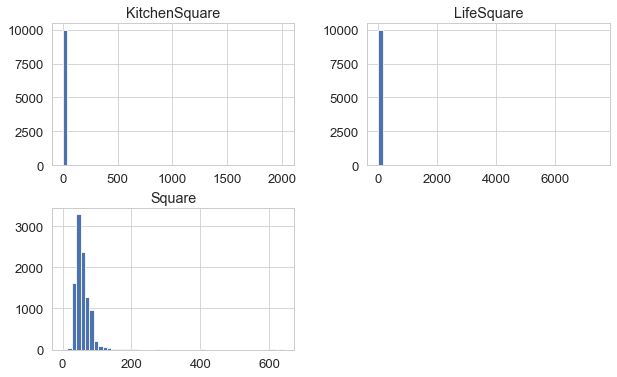

In [14]:
df_train[['Square', 'LifeSquare', 'KitchenSquare']].hist(figsize=(10,6), bins=50, grid=True)
plt.show()

In [15]:
df_train[['Square', 'LifeSquare', 'KitchenSquare']].describe()

,Square,LifeSquare,KitchenSquare
count,10000.0000,10000.0000,10000.0000
mean,56.3158,41.7995,6.2733
std,21.0587,77.8235,28.5609
min,1.1369,0.3706,0.0000
25%,41.7749,25.4942,1.0000
50%,52.5133,37.0408,6.0000
75%,65.9006,49.8232,9.0000
max,641.0652,7480.5921,2014.0000


In [16]:
df_train.loc[(df_train['KitchenSquare'] > 150) | \
             (df_train['KitchenSquare'] > df_train['Square']), 
             'KitchenSquare'] =  df_train['KitchenSquare'].median()

df_test.loc[(df_test['KitchenSquare'] > 150) | \
             (df_test['KitchenSquare'] > df_test['Square']), 
             'KitchenSquare'] =  df_train['KitchenSquare'].median()

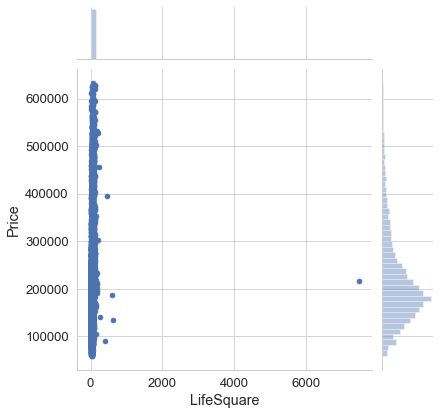

In [17]:
sns.jointplot(df_train['LifeSquare'], df_train['Price'], kind='scatter', height=6)
plt.show()

In [18]:
df_train.loc[df_train['LifeSquare'] > 400 , 'LifeSquare'] =  df_train['LifeSquare'].median()
df_test.loc[df_test['LifeSquare'] > 400 , 'LifeSquare'] =  df_train['LifeSquare'].median()

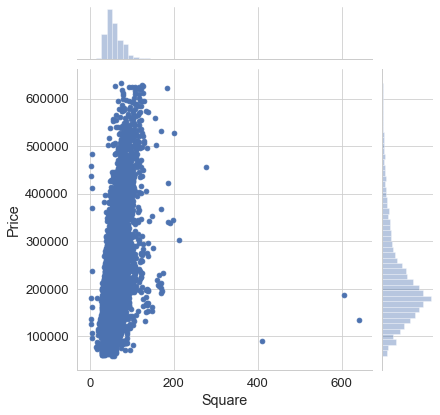

In [19]:
sns.jointplot(df_train['Square'], df_train['Price'], kind='scatter', height=6)
plt.show()

In [20]:
train_df = df_train
test_df = df_test

In [21]:
train_df.loc[(train_df['Square'] > 400) | (train_df['Square'] < 6), 'Square'] = \
            train_df['Square'].median()

test_df.loc[(test_df['Square'] > 400) | (test_df['Square'] < 6), 'Square'] = \
            train_df['Square'].median()

len(train_df[(train_df['Square'] < train_df['LifeSquare'] + train_df['KitchenSquare'])])

In [22]:
train_df.loc[(train_df['Square'] < train_df['LifeSquare'] + train_df['KitchenSquare']), 'Square'] = \
    train_df['LifeSquare'] + train_df['KitchenSquare']

test_df.loc[(test_df['Square'] < test_df['LifeSquare'] + test_df['KitchenSquare']), 'Square'] = \
    test_df['LifeSquare'] + test_df['KitchenSquare']

In [23]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].describe()

,Square,LifeSquare,KitchenSquare
count,10000.0000,10000.0000,10000.0000
mean,56.7775,40.8585,5.8616
std,19.7484,20.5706,5.0704
min,16.1172,0.3706,0.0000
25%,42.1233,25.4942,1.0000
50%,52.9517,37.0396,6.0000
75%,66.3321,49.7715,9.0000
max,275.6453,263.5420,123.0000


HouseFloor, Floor

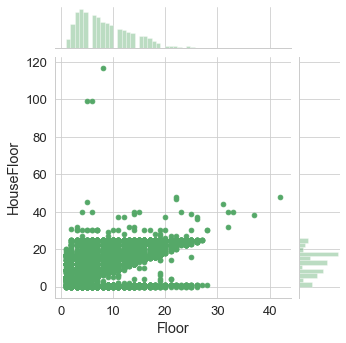

In [24]:
sns.jointplot(train_df['Floor'], train_df['HouseFloor'], kind='scatter', height=5, color='g');

In [25]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].mode()[0]
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].mode()[0]

train_df.loc[train_df['HouseFloor'] > 98, 'HouseFloor'] = train_df['HouseFloor'].mode()[0]
test_df.loc[test_df['HouseFloor'] > 98, 'HouseFloor'] = train_df['HouseFloor'].mode()[0]

In [26]:
floor_outliers_train = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index
floor_outliers_test = test_df.loc[test_df['Floor'] > test_df['HouseFloor']].index

train_df.loc[floor_outliers_train, 'Floor'] = \
    train_df.loc[floor_outliers_train, 'HouseFloor'].apply(lambda x: random.randint(1, x))
test_df.loc[floor_outliers_test, 'Floor'] = \
    test_df.loc[floor_outliers_test, 'HouseFloor'].apply(lambda x: random.randint(1, x))

HouseYear

In [27]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

### Обработка редких категорий

DistrictId

In [28]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
                .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

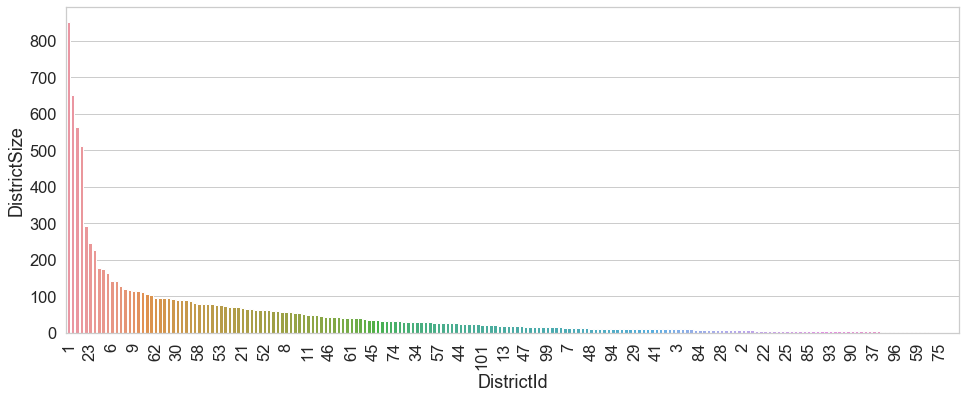

In [29]:
sns.set(style="whitegrid", font_scale=1.5)
f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y='DistrictSize', x='DistrictId', 
            data=district_size,
            order=district_size.sort_values(by='DistrictSize', ascending=False)['DistrictId']
           );
ax.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(50))

In [30]:
districts_popular = district_size.loc[district_size['DistrictSize'] > 100, 'DistrictId'].tolist()

Заменим `DistrictId` редких районов (с количеством квартир < 100) на номер 999.

In [31]:
district_size.loc[~district_size['DistrictId'].isin(districts_popular), 'DistrictId'] = 999
district_size = district_size.groupby('DistrictId')['DistrictSize'].agg(
                            DistrictSize='median')
district_size.reset_index(level='DistrictId', inplace=True)
district_size

,DistrictId,DistrictSize
0,999,15
1,1,652
2,11,129
3,21,165
4,23,565
5,27,851
6,30,228
7,34,111
8,44,104
9,45,116


In [32]:
train_df.loc[~train_df['DistrictId'].isin(districts_popular), 'DistrictId'] = 999
test_df.loc[~test_df['DistrictId'].isin(districts_popular), 'DistrictId'] = 999

### Построение новых признаков

DistrictSize - Размер района

In [33]:
train_df = train_df.merge(district_size, on='DistrictId', how='left').set_index(train_df.index)
test_df = test_df.merge(district_size, on='DistrictId', how='left').set_index(test_df.index)

PriceOneRoom - Стоимость одной комнаты

In [34]:
train_df['PriceOneRoom'] = train_df['Price'] / train_df['Rooms']

PriceOneRoomByDistrict - Стоимость одной комнаты в зависимости от района

In [35]:
price_by_district = train_df.groupby(['DistrictId'], as_index=False)\
                        .agg({'PriceOneRoom':'median'})\
                        .rename(columns={'PriceOneRoom':'PriceOneRoomByDistrict'})

train_df = train_df.merge(price_by_district, on=['DistrictId'], how='left').set_index(train_df.index)
test_df = test_df.merge(price_by_district, on=['DistrictId'], how='left').set_index(test_df.index)

PriceOneSquare- Стоимость одного кв. метра

In [36]:
train_df['PriceOneSquare'] = train_df['Price'] / train_df['Square']

PriceOneSquareByDistrict - Стоимость одного кв. метра в зависимости от района

In [37]:
price_square_by_district = train_df.groupby(['DistrictId'], as_index=False)\
                        .agg({'PriceOneSquare':'median'})\
                        .rename(columns={'PriceOneSquare':'PriceOneSquareByDistrict'})

train_df = train_df.merge(price_square_by_district, on=['DistrictId'], how='left').set_index(train_df.index)
test_df = test_df.merge(price_square_by_district, on=['DistrictId'], how='left').set_index(test_df.index)

In [38]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,10000.0000,1.8884,0.8111,1.0000,1.0000,2.0000,2.0000,5.0000
Square,10000.0000,56.7775,19.7484,16.1172,42.1233,52.9517,66.3321,275.6453
LifeSquare,10000.0000,40.8585,20.5706,0.3706,25.4942,37.0396,49.7715,263.5420
KitchenSquare,10000.0000,5.8616,5.0704,0.0000,1.0000,6.0000,9.0000,123.0000
Floor,10000.0000,7.4407,5.0462,1.0000,3.0000,6.0000,11.0000,42.0000
HouseFloor,10000.0000,13.0403,6.2763,1.0000,9.0000,14.0000,17.0000,48.0000
HouseYear,10000.0000,1984.8724,18.4163,1910.0000,1974.0000,1977.0000,2001.0000,2020.0000
Ecology_1,10000.0000,0.1189,0.1190,0.0000,0.0176,0.0754,0.1958,0.5219
Ecology_2,10000.0000,0.0097,0.0980,0.0000,0.0000,0.0000,0.0000,1.0000
Ecology_3,10000.0000,0.0275,0.1635,0.0000,0.0000,0.0000,0.0000,1.0000


RoomSquare - Площадь одной комнаты

In [39]:
train_df['RoomSquare'] = train_df['LifeSquare'] / train_df['Rooms']
test_df['RoomSquare'] = test_df['LifeSquare'] / test_df['Rooms']

Floor_cat - Категория этажа квартиры

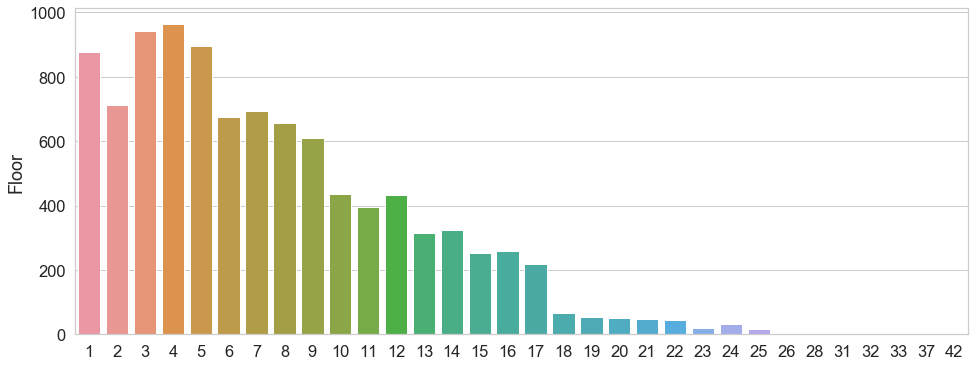

In [34]:
sns.set(style="whitegrid", font_scale=1.5)

f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y=train_df['Floor'].value_counts(), x=train_df['Floor'].value_counts().index);

In [35]:
train_df.loc[train_df['Floor'] <= 5, 'Floor_cat'] = 1  
train_df.loc[(train_df['Floor'] > 5) & (train_df['Floor'] <= 12), 'Floor_cat'] = 2
train_df.loc[(train_df['Floor'] > 12) & (train_df['Floor'] <= 17), 'Floor_cat'] = 3
train_df.loc[train_df['Floor'] > 17, 'Floor_cat'] = 4

test_df.loc[test_df['Floor'] <= 5, 'Floor_cat'] = 1  
test_df.loc[(test_df['Floor'] > 5) & (test_df['Floor'] <= 12), 'Floor_cat'] = 2
test_df.loc[(test_df['Floor'] > 12) & (test_df['Floor'] <= 17), 'Floor_cat'] = 3
test_df.loc[test_df['Floor'] > 17, 'Floor_cat'] = 4

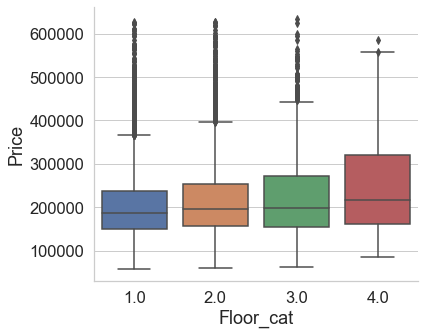

In [36]:
sns.catplot("Floor_cat", "Price", kind="box", data=train_df, aspect=5/4);

HouseFloor_cat - Категория этажности здания

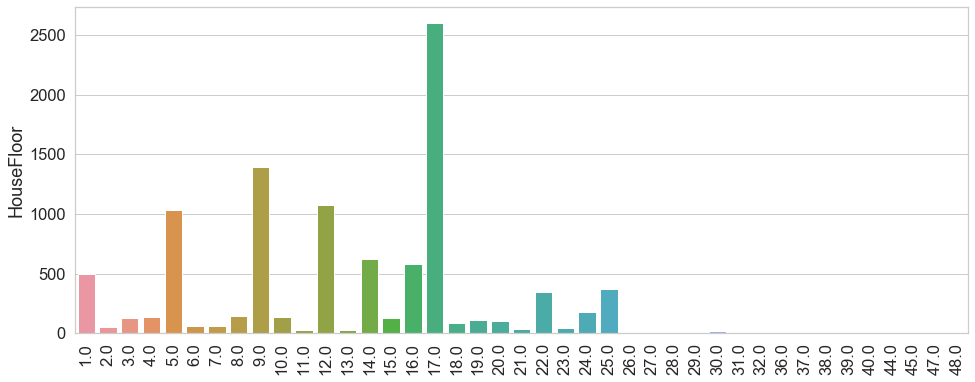

In [37]:
sns.set(style="whitegrid", font_scale=1.5)

f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(y=train_df['HouseFloor'].value_counts(), 
            x=train_df['HouseFloor'].value_counts().index,
           )
ax.tick_params(axis='x', rotation=90);

In [38]:
train_df.loc[train_df['HouseFloor'] <= 5, 'HouseFloor_cat'] = 1  
train_df.loc[(train_df['HouseFloor'] > 5) & (train_df['HouseFloor'] <= 12), 'HouseFloor_cat'] = 2
train_df.loc[(train_df['HouseFloor'] > 12) & (train_df['HouseFloor'] <= 17), 'HouseFloor_cat'] = 3
train_df.loc[train_df['HouseFloor'] > 17, 'HouseFloor_cat'] = 4

test_df.loc[test_df['HouseFloor'] <= 5, 'HouseFloor_cat'] = 1  
test_df.loc[(test_df['HouseFloor'] > 5) & (test_df['HouseFloor'] <= 12), 'HouseFloor_cat'] = 2
test_df.loc[(test_df['HouseFloor'] > 12) & (test_df['HouseFloor'] <= 17), 'HouseFloor_cat'] = 3
test_df.loc[test_df['HouseFloor'] > 17, 'HouseFloor_cat'] = 4

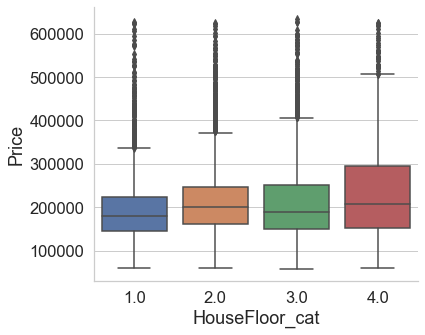

In [39]:
sns.catplot("HouseFloor_cat", "Price", kind="box", data=train_df, aspect=5/4);

StoreysFloor - Категория квартиры в зависимости от этажности здания и этажа квартиры

In [40]:
train_df[['Floor_cat', 'HouseFloor_cat']] = train_df[['Floor_cat', 'HouseFloor_cat']].astype(int)
test_df[['Floor_cat', 'HouseFloor_cat']] = test_df[['Floor_cat', 'HouseFloor_cat']].astype(int)

train_df['StoreysFloor'] = (train_df['HouseFloor_cat'].astype(str) + \
                            train_df['Floor_cat'].astype(str)).astype(int)
test_df['StoreysFloor'] = (test_df['HouseFloor_cat'].astype(str) + \
                            test_df['Floor_cat'].astype(str)).astype(int)

train_df['StoreysFloor'].value_counts()

32    1870
11    1837
22    1563
21    1321
31    1048
33    1036
42     464
44     341
43     334
41     186
Name: StoreysFloor, dtype: int64

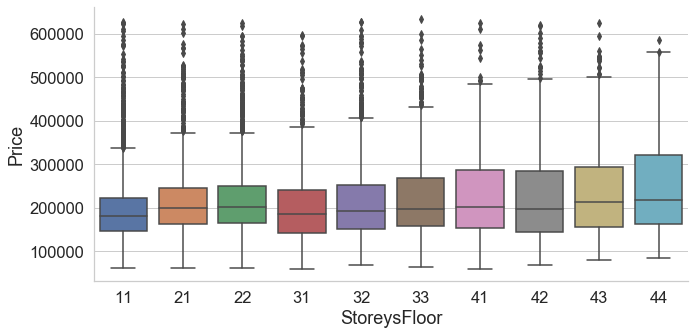

In [41]:
sns.catplot("StoreysFloor", "Price", kind="box", data=train_df, aspect=2/1);

PriceOneRoomByStoreysFloor - Стоимость одной комнаты в зависимости от категории StoreysFloor

In [48]:
price_by_floor_storeys = train_df.groupby(['StoreysFloor'], as_index=False)\
                    .agg({'PriceOneRoom':'median'})\
                    .rename(columns={'PriceOneRoom':'PriceOneRoomByStoreysFloor'})

In [49]:
train_df = train_df.merge(price_by_floor_storeys, on=['StoreysFloor'], how='left').set_index(train_df.index)
test_df = test_df.merge(price_by_floor_storeys, on=['StoreysFloor'], how='left').set_index(test_df.index)

PriceOneSquareByStoreysFloor - Стоимость одного кв. метра в зависимости от StoreysFloor

In [50]:
price_square_by_storeysfloor = train_df.groupby(['StoreysFloor'], as_index=False)\
                        .agg({'PriceOneSquare':'median'})\
                        .rename(columns={'PriceOneSquare':'PriceOneSquareByStoreysFloor'})

train_df = train_df.merge(price_square_by_storeysfloor, on=['StoreysFloor'], how='left').set_index(train_df.index)
test_df = test_df.merge(price_square_by_storeysfloor, on=['StoreysFloor'], how='left').set_index(test_df.index)

### Мои новые признаки

In [42]:
df_train = train_df
df_test = test_df

In [64]:
df_train['PriceOneRoom'] = df_train['Price'] / df_train['Rooms']

In [44]:
price_by_district = df_train.groupby(['DistrictId'], as_index=False)\
                        .agg({'PriceOneRoom':'median'})\
                        .rename(columns={'PriceOneRoom':'PriceOneRoomByDistrict'})

df_train = df_train.merge(price_by_district, on=['DistrictId'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_by_district, on=['DistrictId'], how='left').set_index(df_test.index)

In [45]:
price_by_houseyear = df_train.groupby(['HouseYear'], as_index=False)\
                        .agg({'PriceOneRoom':'median'})\
                        .rename(columns={'PriceOneRoom':'PriceOneRoomByHouseYear'})

df_train = df_train.merge(price_by_houseyear, on=['HouseYear'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_by_houseyear, on=['HouseYear'], how='left').set_index(df_test.index)

In [46]:
price_by_ecology1 = df_train.groupby(['Ecology_1'], as_index=False)\
                        .agg({'PriceOneRoom':'median'})\
                        .rename(columns={'PriceOneRoom':'PriceOneRoomByEcology1'})

df_train = df_train.merge(price_by_ecology1, on=['Ecology_1'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_by_ecology1, on=['Ecology_1'], how='left').set_index(df_test.index)

In [47]:
price_by_floor = df_train.groupby(['Floor'], as_index=False)\
                        .agg({'PriceOneRoom':'median'})\
                        .rename(columns={'PriceOneRoom':'PriceOneRoomByFloor'})

df_train = df_train.merge(price_by_floor, on=['Floor'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_by_floor, on=['Floor'], how='left').set_index(df_test.index)

In [48]:
price_by_social3 = df_train.groupby(['Social_3'], as_index=False)\
                        .agg({'PriceOneRoom':'median'})\
                        .rename(columns={'PriceOneRoom':'PriceOneRoomBySocial3'})

df_train = df_train.merge(price_by_social3, on=['Social_3'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_by_social3, on=['Social_3'], how='left').set_index(df_test.index)

In [49]:
price_by_social1 = df_train.groupby(['Social_1'], as_index=False)\
                        .agg({'PriceOneRoom':'median'})\
                        .rename(columns={'PriceOneRoom':'PriceOneRoomBySocial1'})

df_train = df_train.merge(price_by_social1, on=['Social_1'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_by_social1, on=['Social_1'], how='left').set_index(df_test.index)

In [50]:
price_by_shops1 = df_train.groupby(['Shops_1'], as_index=False)\
                        .agg({'PriceOneRoom':'median'})\
                        .rename(columns={'PriceOneRoom':'PriceOneRoomByShops1'})

df_train = df_train.merge(price_by_shops1, on=['Shops_1'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_by_shops1, on=['Shops_1'], how='left').set_index(df_test.index)

In [65]:
df_train['PriceOneSquare'] = df_train['Price'] / df_train['Square']

In [52]:
price_square_by_district = df_train.groupby(['DistrictId'], as_index=False)\
                        .agg({'PriceOneSquare':'median'})\
                        .rename(columns={'PriceOneSquare':'PriceOneSquareByDistrict'})

df_train = df_train.merge(price_square_by_district, on=['DistrictId'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_square_by_district, on=['DistrictId'], how='left').set_index(df_test.index)

In [53]:
price_square_by_floor = df_train.groupby(['Floor'], as_index=False)\
                        .agg({'PriceOneSquare':'median'})\
                        .rename(columns={'PriceOneSquare':'PriceOneSquareByFloor'})

df_train = df_train.merge(price_square_by_floor, on=['Floor'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_square_by_floor, on=['Floor'], how='left').set_index(df_test.index)

In [54]:
price_square_by_house_year = df_train.groupby(['HouseYear'], as_index=False)\
                        .agg({'PriceOneSquare':'median'})\
                        .rename(columns={'PriceOneSquare':'PriceOneSquareByHouseYear'})

df_train = df_train.merge(price_square_by_house_year, on=['HouseYear'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_square_by_house_year, on=['HouseYear'], how='left').set_index(df_test.index)

In [55]:
price_square_by_ecology1 = df_train.groupby(['Ecology_1'], as_index=False)\
                        .agg({'PriceOneSquare':'median'})\
                        .rename(columns={'PriceOneSquare':'PriceOneSquareByEcology1'})

df_train = df_train.merge(price_square_by_ecology1, on=['Ecology_1'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_square_by_ecology1, on=['Ecology_1'], how='left').set_index(df_test.index)

In [56]:
price_square_by_social1 = df_train.groupby(['Social_1'], as_index=False)\
                        .agg({'PriceOneSquare':'median'})\
                        .rename(columns={'PriceOneSquare':'PriceOneSquareBySocial1'})

df_train = df_train.merge(price_square_by_social1, on=['Social_1'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_square_by_social1, on=['Social_1'], how='left').set_index(df_test.index)

In [61]:
price_square_by_social3 = df_train.groupby(['Social_3'], as_index=False)\
                        .agg({'PriceOneSquare':'median'})\
                        .rename(columns={'PriceOneSquare':'PriceOneSquareBySocial3'})

df_train = df_train.merge(price_square_by_social3, on=['Social_3'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_square_by_social3, on=['Social_3'], how='left').set_index(df_test.index)

In [66]:
price_square_by_shops1 = df_train.groupby(['Shops_1'], as_index=False)\
                        .agg({'PriceOneSquare':'median'})\
                        .rename(columns={'PriceOneSquare':'PriceOneSquareByShops1'})

df_train = df_train.merge(price_square_by_shops1, on=['Shops_1'], how='left').set_index(df_train.index)
df_test = df_test.merge(price_square_by_shops1, on=['Shops_1'], how='left').set_index(df_test.index)

In [67]:
df_train.drop('PriceOneRoom', axis=1, inplace=True)
df_train.drop('PriceOneSquare', axis=1, inplace=True)

In [68]:
df_test['PriceOneRoomByDistrict'].fillna(value=df_train['PriceOneRoomByDistrict'].median(), inplace=True)
df_test['PriceOneRoomByHouseYear'].fillna(value=df_train['PriceOneRoomByHouseYear'].median(), inplace=True)
df_test['PriceOneRoomByFloor'].fillna(value=df_train['PriceOneRoomByFloor'].median(), inplace=True)
df_test['PriceOneRoomByEcology1'].fillna(value=df_train['PriceOneRoomByEcology1'].median(), inplace=True)
df_test['PriceOneRoomBySocial1'].fillna(value=df_train['PriceOneRoomBySocial1'].median(), inplace=True)
df_test['PriceOneRoomBySocial3'].fillna(value=df_train['PriceOneRoomBySocial3'].median(), inplace=True)
df_test['PriceOneRoomByShops1'].fillna(value=df_train['PriceOneRoomByShops1'].median(), inplace=True)

df_test['PriceOneSquareByDistrict'].fillna(value=df_train['PriceOneSquareByDistrict'].median(), inplace=True)
df_test['PriceOneSquareByFloor'].fillna(value=df_train['PriceOneSquareByFloor'].median(), inplace=True)
df_test['PriceOneSquareByHouseYear'].fillna(value=df_train['PriceOneSquareByHouseYear'].median(), inplace=True)
df_test['PriceOneSquareByEcology1'].fillna(value=df_train['PriceOneSquareByEcology1'].median(), inplace=True)
df_test['PriceOneSquareBySocial1'].fillna(value=df_train['PriceOneSquareBySocial1'].median(), inplace=True)
df_test['PriceOneSquareBySocial3'].fillna(value=df_train['PriceOneSquareBySocial3'].median(), inplace=True)
df_test['PriceOneSquareByShops1'].fillna(value=df_train['PriceOneSquareByShops1'].median(), inplace=True)

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DistrictId                 10000 non-null  object 
 1   Rooms                      10000 non-null  float64
 2   Square                     10000 non-null  float64
 3   LifeSquare                 10000 non-null  float64
 4   KitchenSquare              10000 non-null  float64
 5   Floor                      10000 non-null  int64  
 6   HouseFloor                 10000 non-null  float64
 7   HouseYear                  10000 non-null  int64  
 8   Ecology_1                  10000 non-null  float64
 9   Ecology_2                  10000 non-null  int64  
 10  Ecology_3                  10000 non-null  int64  
 11  Social_1                   10000 non-null  int64  
 12  Social_2                   10000 non-null  int64  
 13  Social_3                   10000 non-null  

In [70]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DistrictId                 5000 non-null   object 
 1   Rooms                      5000 non-null   float64
 2   Square                     5000 non-null   float64
 3   LifeSquare                 5000 non-null   float64
 4   KitchenSquare              5000 non-null   float64
 5   Floor                      5000 non-null   int64  
 6   HouseFloor                 5000 non-null   float64
 7   HouseYear                  5000 non-null   int64  
 8   Ecology_1                  5000 non-null   float64
 9   Ecology_2                  5000 non-null   object 
 10  Ecology_3                  5000 non-null   object 
 11  Social_1                   5000 non-null   int64  
 12  Social_2                   5000 non-null   int64  
 13  Social_3                   5000 non-null   in

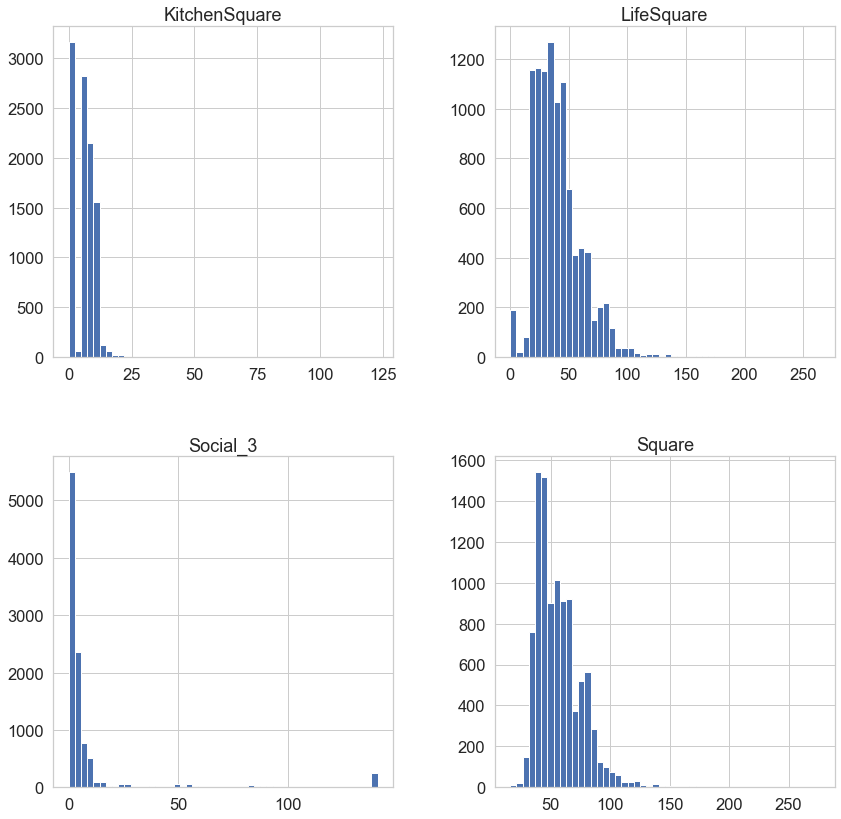

In [71]:
feature_num_names = ['Square', 'LifeSquare', 'KitchenSquare', 'Social_3']

df_train[feature_num_names].hist(figsize=(14,14), bins=50, grid=True);

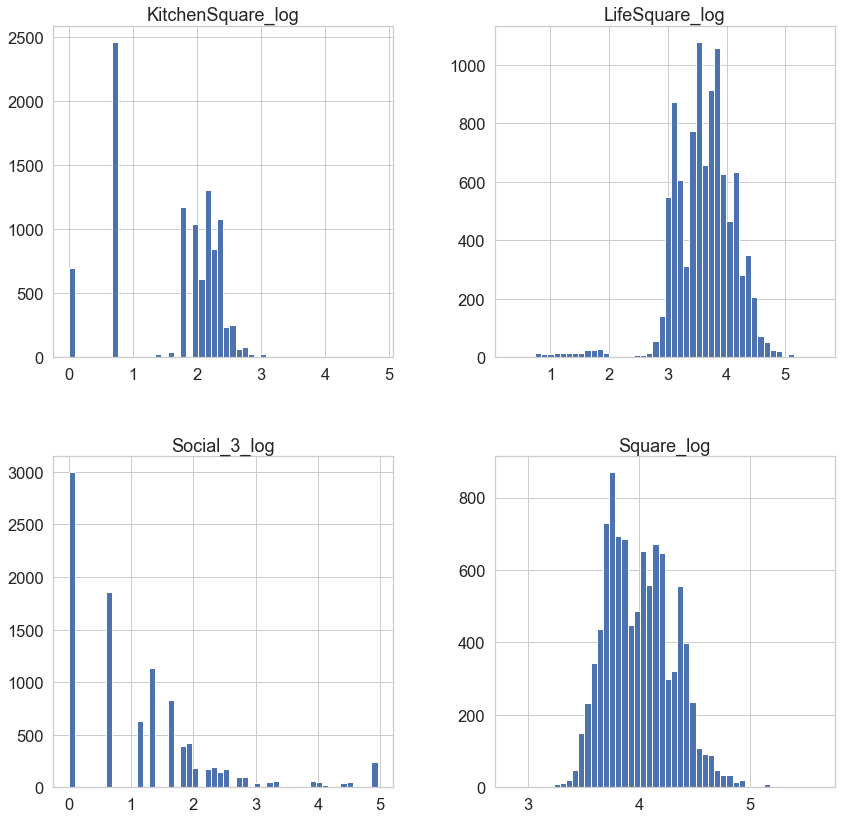

In [72]:
feature_log_names = []
for f in feature_num_names:
    df_train[f + '_log'] = np.log(df_train[f]+1)
    df_test[f + '_log'] = np.log(df_test[f]+1)
    feature_log_names.append(f + '_log')
    
df_train[feature_log_names].hist(figsize=(14,14), bins=50, grid=True);

### Логарифмируем некоторые признаки

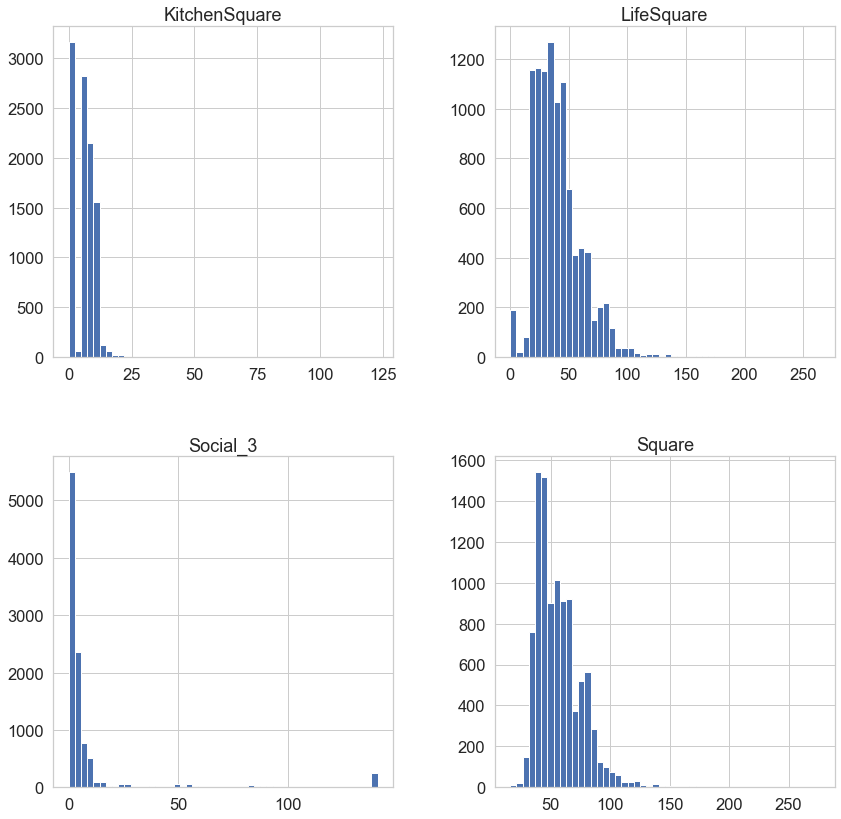

In [51]:
feature_num_names = ['Square', 'LifeSquare', 'KitchenSquare', 'Social_3']

train_df[feature_num_names].hist(figsize=(14,14), bins=50, grid=True);

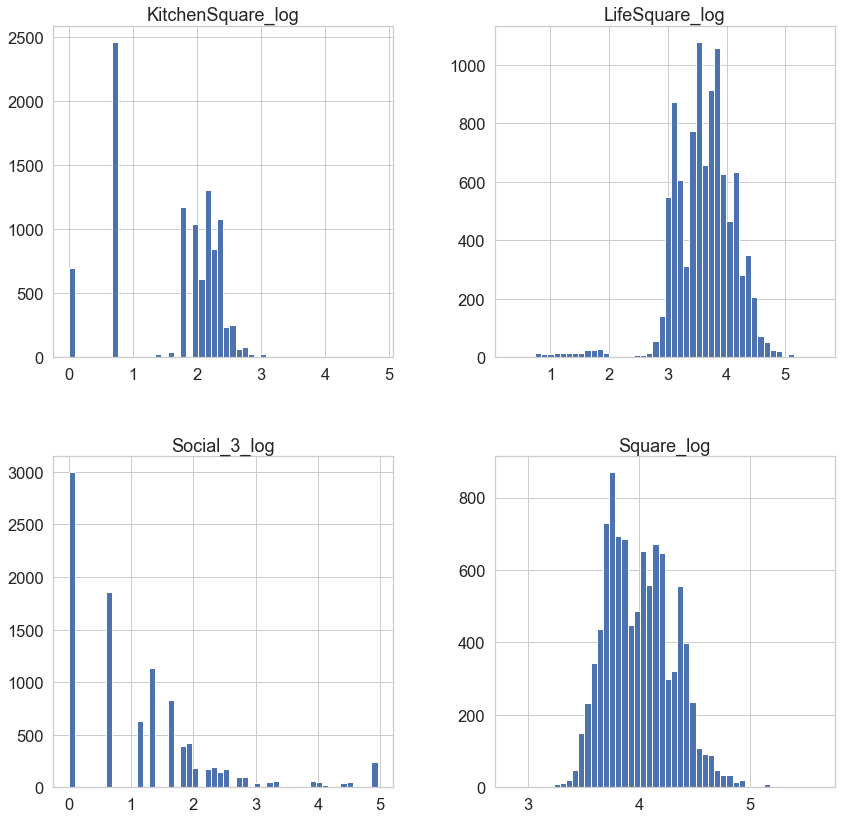

In [52]:
feature_log_names = []
for f in feature_num_names:
    train_df[f + '_log'] = np.log(train_df[f]+1)
    test_df[f + '_log'] = np.log(test_df[f]+1)
    feature_log_names.append(f + '_log')
    
    
train_df[feature_log_names].hist(figsize=(14,14), bins=50, grid=True);

### Отбор признаков

In [53]:
test_df.info(), train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DistrictId                    5000 non-null   object 
 1   Rooms                         5000 non-null   float64
 2   Square                        5000 non-null   float64
 3   LifeSquare                    5000 non-null   float64
 4   KitchenSquare                 5000 non-null   float64
 5   Floor                         5000 non-null   int64  
 6   HouseFloor                    5000 non-null   float64
 7   HouseYear                     5000 non-null   int64  
 8   Ecology_1                     5000 non-null   float64
 9   Ecology_2                     5000 non-null   object 
 10  Ecology_3                     5000 non-null   object 
 11  Social_1                      5000 non-null   int64  
 12  Social_2                      5000 non-null   int64  
 13  

(None, None)

In [82]:
target_name = ['Price']
feature_names = [
             'DistrictId',
             'Rooms',
             'Square',
             'LifeSquare',
             'KitchenSquare',
             'Floor',
             'HouseFloor',
             'HouseYear',
             'Ecology_1',
             'Ecology_2',
             'Ecology_3',
             'Social_1',
             'Social_2',
             'Social_3',
#             'Healthcare_1',
             'Helthcare_2',
             'Shops_1',
             'Shops_2',
#             'Price',
             'DistrictSize',
#             'PriceOneRoom',
             'PriceOneRoomByDistrict',
             'RoomSquare',
#             'Floor_cat',
#             'HouseFloor_cat',
#             'StoreysFloor',
#             'PriceOneRoomByStoreysFloor',
             'PriceOneSquareByDistrict',
#             'PriceOneSquareByStoreysFloor',
             'Square_log',
#             'LifeSquare_log',
#             'KitchenSquare_log',
#             'Social_3_log'   
]

In [83]:
train_df.shape, test_df.shape

((10000, 34), (5000, 31))

In [84]:
X = train_df[feature_names]
y = train_df[target_name]

X_test = test_df[feature_names]

In [85]:
X.shape, y.shape, X_test.shape

((10000, 22), (10000, 1), (5000, 22))

## Построение базовой модели (baseline)

In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV

In [149]:
forest = RandomForestRegressor(max_depth=19, 
                               max_features=5, 
                               n_estimators=200,
                               random_state=42)



In [150]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

cv_score = cross_val_score(forest, X, y['Price'], scoring='r2', cv=kf)
print('R2: {:.5f}'.format(cv_score.mean()))

R2: 0.73943


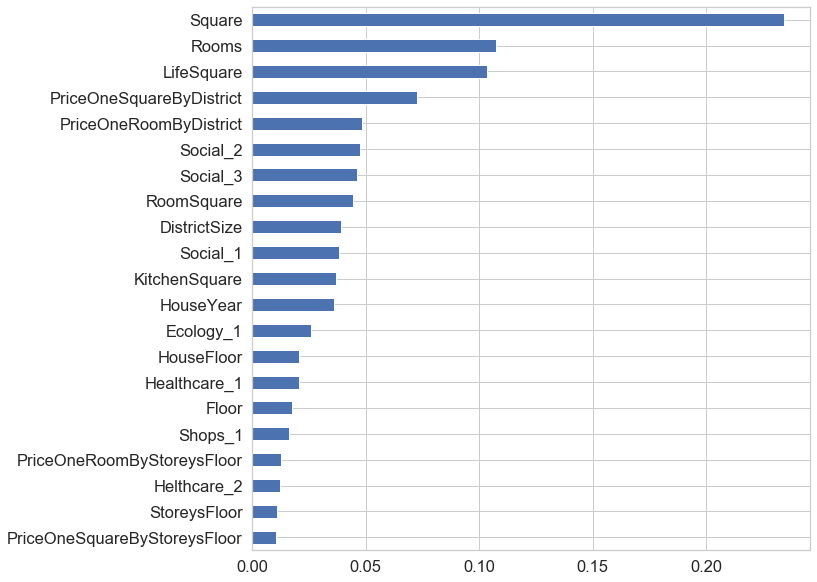

In [151]:
forest.fit(X, y['Price'])
importances = forest.feature_importances_
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.sort_values(ascending=True, inplace=True)

feat_importances.plot(kind='barh', figsize=(10, 10));

### Прогнозирование на тестовом датасете

In [152]:
y_pred = forest.predict(X_test)

preds = pd.DataFrame()
preds['Id'] = X_test.index
preds['Price'] = y_pred

In [153]:
preds.to_csv('submission.csv', index=False)

## Градиентный бустинг (без тюнинга)

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV

In [87]:
gb = GradientBoostingRegressor(max_depth=5, 
                               n_estimators=200,
                               learning_rate=0.1,
                               random_state=42)

In [88]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

cv_score = cross_val_score(gb, X, y['Price'], scoring='r2', cv=kf)
print('R2: {:.5f}'.format(cv_score.mean()))

R2: 0.73889


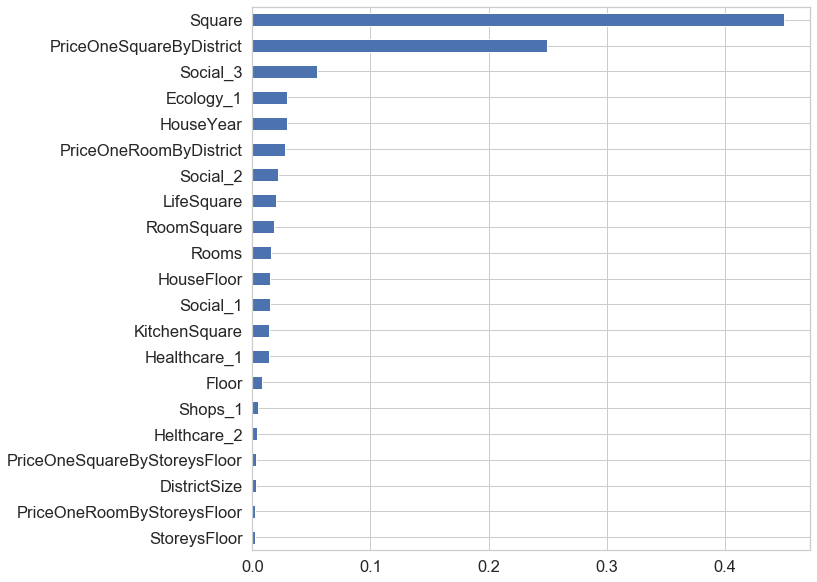

In [89]:
gb.fit(X, y['Price'])
importances = gb.feature_importances_
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.sort_values(ascending=True, inplace=True)

feat_importances.plot(kind='barh', figsize=(10, 10));

### Градиентный бустинг с тюнингом

In [171]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500, 26), (2500, 26), (7500, 1), (2500, 1))

In [174]:
gb_model = GradientBoostingRegressor(random_state=42)
params = {'n_estimators':[i for i in range(100, 600, 100)], 
          'max_depth':[i for i in range(5, 17, 2)],
          'learning_rate': [0.1, 0.25, 0.5, 0.75]}

gs = GridSearchCV(gb_model, params, scoring='r2', 
                  cv=KFold(n_splits=3, random_state=42, shuffle=True), 
                  n_jobs=-1)

In [175]:
gs.fit(X_train, y_train)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weigh...
                                                 n_iter_no_change=None,
                                         

In [176]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [177]:
gs.best_score_

0.7242642483269538

### Масштабируем признаки

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500, 26), (2500, 26), (7500, 1), (2500, 1))

In [180]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), 
                        columns=X_train.columns, 
                        index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), 
                        columns=X_test.columns, 
                        index=X_test.index)

X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,7500.0000,0.0000,1.0001,-1.0949,-1.0949,0.1422,0.1422,3.8534
Square,7500.0000,0.0000,1.0001,-2.0861,-0.7520,-0.1936,0.4954,9.8719
LifeSquare,7500.0000,0.0000,1.0001,-2.0007,-0.7483,-0.1890,0.4435,7.9487
KitchenSquare,7500.0000,0.0000,1.0001,-1.1265,-0.9345,0.0253,0.6011,22.4837
Floor,7500.0000,0.0000,1.0001,-1.2681,-0.8731,-0.2808,0.7065,6.8278
HouseFloor,7500.0000,-0.0000,1.0001,-1.9174,-0.6435,0.1527,0.6304,5.5667
HouseYear,7500.0000,0.0000,1.0001,-3.9752,-0.5995,-0.4362,0.8706,1.9050
Ecology_1,7500.0000,0.0000,1.0001,-0.9937,-0.8443,-0.3831,0.6520,3.4220
Ecology_2,7500.0000,-0.0000,1.0001,-0.0971,-0.0971,-0.0971,-0.0971,10.3026
Ecology_3,7500.0000,-0.0000,1.0001,-0.1701,-0.1701,-0.1701,-0.1701,5.8775


## Кластеры...

In [181]:
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d.axes3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [185]:
def apply_elbow_method(X):
    distortions = []
    K = range(2,15)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
        distortions.append(sum(np.min(cdist(X, 
                                            kmeanModel.cluster_centers_, 
                                            'euclidean'), 
                                      axis=1)) / X.shape[0])

    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
   
    return None


def display_clusters_distribution(unique_labels, labels_counts):
    plt.figure(figsize=(8,5))

    plt.bar(unique, counts)

    plt.xlabel('Clusters')
    plt.xticks(unique)
    plt.ylabel('Count')
    plt.title('Clusters distribution')
    
    return None


def reduce_dims_to_2D_space_with_PCA(df):
    pca = PCA(n_components=2)
    components = pca.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2'])
    
def reduce_dims_to_3D_space_with_PCA(df):
    pca = PCA(n_components=3)
    components = pca.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2', 'component_3'])

def reduce_dims_to_2D_space_with_TSNE(df):
    tsne = TSNE(n_components=2, random_state=42)
    components = tsne.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2'])
    
def reduce_dims_to_3D_space_with_TSNE(df):
    tsne = TSNE(n_components=3, random_state=42)
    components = tsne.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2', 'component_3']) 


def display_components_in_3D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, labels], axis=1)

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    
    if labels is not None:
        p = ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   c=labels, cmap=plt.get_cmap('jet'), alpha=0.5)
    else:
        p = ax.scatter(components_with_labels_df['component_1'], 
                   components_with_labels_df['component_2'], 
                   components_with_labels_df['component_3'], 
                   alpha=0.5)

    ax.set_xlabel('component_1')
    ax.set_ylabel('component_2')
    ax.set_zlabel('component_3')
    ax.set_title('3D mapping of objects')
    fig.colorbar(p);
    
    
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, labels], axis=1)
    
    if labels is not None:
        p = components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=labels.name, cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=(12,6), sharex=False)
    else:
        p = components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                       alpha=0.5, figsize=(12,6))

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects'); 

In [183]:
components_2d_pca = reduce_dims_to_2D_space_with_PCA(X_train_scaled)
components_2d_tsne = reduce_dims_to_2D_space_with_TSNE(X_train_scaled)

In [186]:
y_train

,Price
Id,
13295,114363.1234
3756,248648.7300
15429,180347.8541
7238,183697.0319
13604,245768.0962
...,...
10013,150136.6105
6431,328680.8694
14239,255102.4067


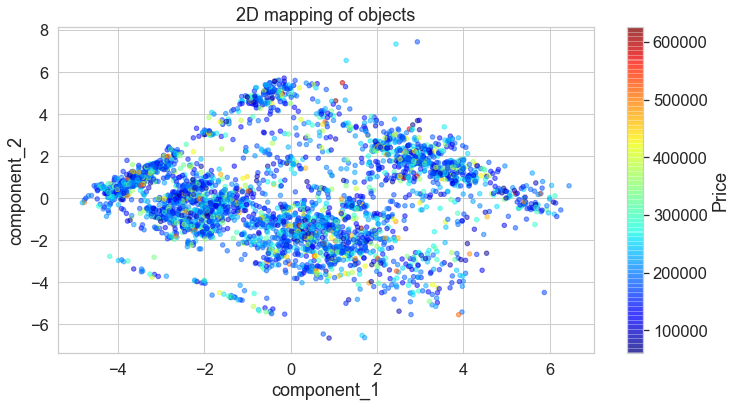

In [187]:
display_components_in_2D_space(components_2d_pca, y_train['Price'])

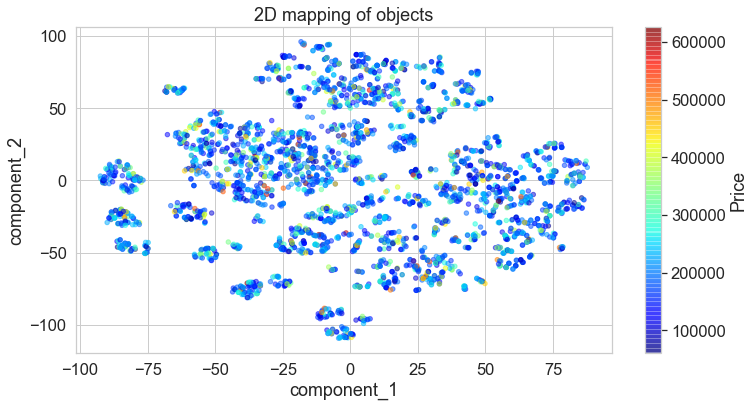

In [188]:
display_components_in_2D_space(components_2d_tsne, y_train['Price'])

In [189]:
components_3d_pca = reduce_dims_to_3D_space_with_PCA(X_train_scaled)
components_3d_tsne = reduce_dims_to_3D_space_with_TSNE(X_train_scaled)

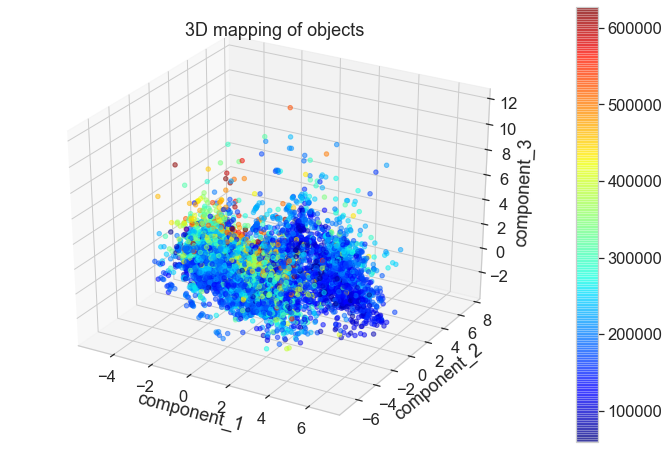

In [190]:
display_components_in_3D_space(components_3d_pca, y_train['Price'])

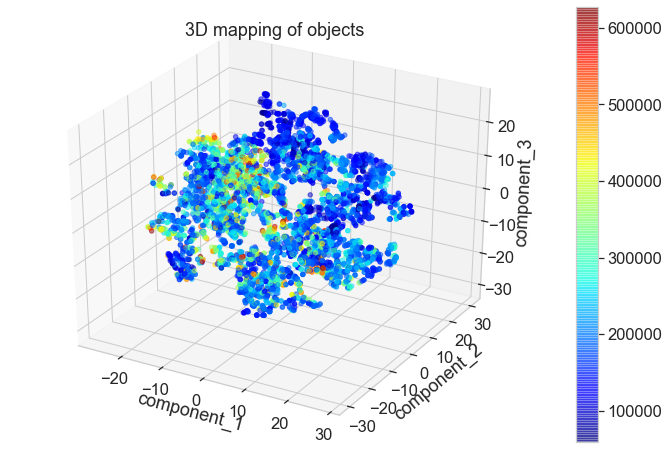

In [191]:
display_components_in_3D_space(components_3d_tsne, y_train['Price'])

In [192]:
pca = PCA(n_components=3)
components_3d_pca_train = pca.fit_transform(X_train_scaled)

for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            X_train_scaled.columns)), '\n')

1 component: 24.17% of initial variance
-0.023 x Rooms + 0.096 x Square + 0.145 x LifeSquare + -0.050 x KitchenSquare + 0.253 x Floor + 0.316 x HouseFloor + 0.188 x HouseYear + -0.033 x Ecology_1 + -0.045 x Ecology_2 + -0.048 x Ecology_3 + -0.205 x Social_1 + -0.178 x Social_2 + -0.039 x Social_3 + -0.104 x Healthcare_1 + -0.176 x Helthcare_2 + -0.113 x Shops_1 + 0.054 x Shops_2 + 0.238 x DistrictSize + -0.209 x PriceOneRoomByDistrict + 0.178 x RoomSquare + 0.252 x Floor_cat + 0.324 x HouseFloor_cat + 0.328 x StoreysFloor + 0.324 x PriceOneRoomByStoreysFloor + -0.234 x PriceOneSquareByDistrict + -0.249 x PriceOneSquareByStoreysFloor 

2 component: 17.41% of initial variance
-0.041 x Rooms + -0.009 x Square + 0.109 x LifeSquare + -0.188 x KitchenSquare + -0.227 x Floor + -0.233 x HouseFloor + -0.091 x HouseYear + -0.022 x Ecology_1 + 0.000 x Ecology_2 + -0.033 x Ecology_3 + -0.327 x Social_1 + -0.320 x Social_2 + -0.060 x Social_3 + -0.042 x Healthcare_1 + -0.223 x Helthcare_2 + -0.229 

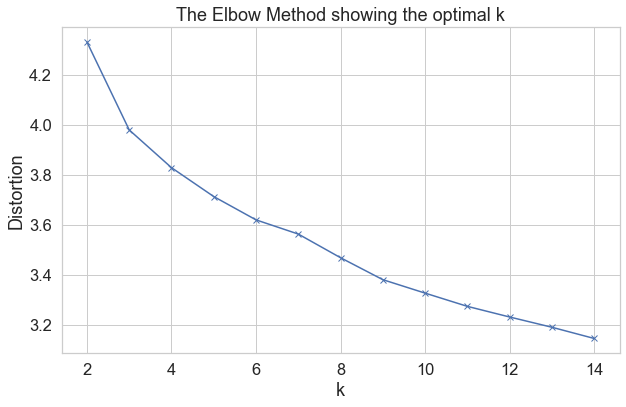

In [193]:
apply_elbow_method(X_train_scaled)

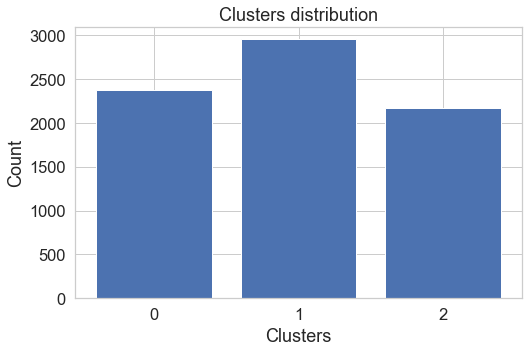

In [194]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_clast_3 = kmeans_3.fit_predict(X_train_scaled)
labels_clast_3 = pd.Series(labels_clast_3, name='clusters_3')

unique, counts = np.unique(labels_clast_3, return_counts=True)
display_clusters_distribution(unique, counts)

In [195]:
labels_clast_3.shape

(7500,)

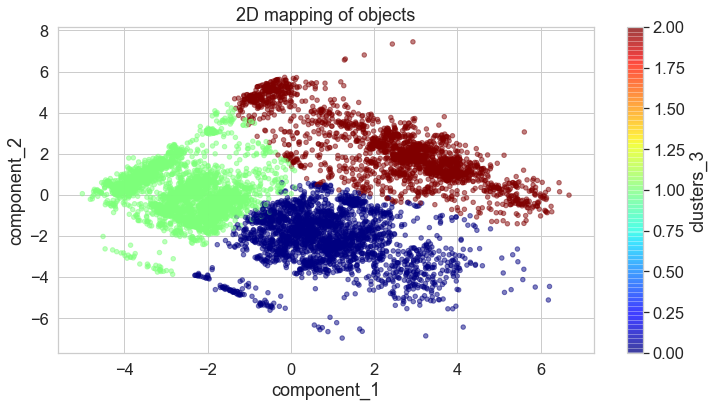

In [196]:
display_components_in_2D_space(components_2d_pca, labels_clast_3)

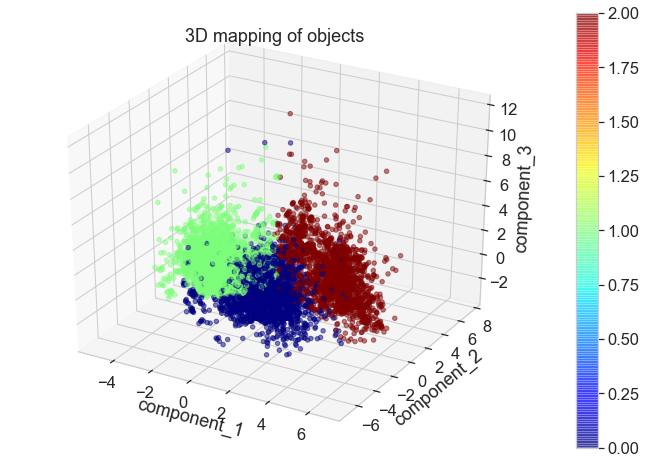

In [197]:
display_components_in_3D_space(components_3d_pca, labels_clast_3)

In [198]:
clusters_3_dummies = pd.get_dummies(labels_clast_3, drop_first=False, prefix='clusters_3')

X_train_ext = pd.concat([X_train_scaled.reset_index(), 
                    clusters_3_dummies], axis=1)

X_train_ext.set_index('Id', inplace=True)

X_train_ext.shape

(7500, 29)

In [199]:
y_train_ext = pd.concat([y_train.reset_index(), 
                    clusters_3_dummies], axis=1)
y_train_ext.set_index('Id', inplace=True)

y_train_ext.shape

(7500, 4)

In [200]:
labels_clast_3_test = kmeans_3.predict(X_test_scaled)

clusters_3_dummies = pd.get_dummies(labels_clast_3_test, drop_first=False, prefix='clusters_3')

X_test_ext = pd.concat([X_test_scaled.reset_index(), 
                    clusters_3_dummies], axis=1)
X_test_ext.set_index('Id', inplace=True)

X_test_ext.shape

(2500, 29)

In [201]:
y_test_ext = pd.concat([y_test.reset_index(), 
                    clusters_3_dummies], axis=1)
y_test_ext.set_index('Id', inplace=True)

y_test_ext.shape

(2500, 4)

In [202]:
X_train_ext.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 13295 to 2135
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rooms                         7500 non-null   float64
 1   Square                        7500 non-null   float64
 2   LifeSquare                    7500 non-null   float64
 3   KitchenSquare                 7500 non-null   float64
 4   Floor                         7500 non-null   float64
 5   HouseFloor                    7500 non-null   float64
 6   HouseYear                     7500 non-null   float64
 7   Ecology_1                     7500 non-null   float64
 8   Ecology_2                     7500 non-null   float64
 9   Ecology_3                     7500 non-null   float64
 10  Social_1                      7500 non-null   float64
 11  Social_2                      7500 non-null   float64
 12  Social_3                      7500 non-null   float64
 13 

#### Модель. Кластер 0

In [203]:
X_train_0 = X_train_ext.loc[X_train_ext['clusters_3_0'] == 1].copy()
y_train_0 = y_train_ext.loc[y_train_ext['clusters_3_0'] == 1].copy()['Price']

X_train_0.drop(['clusters_3_0', 'clusters_3_1', 'clusters_3_2'], axis=1, inplace=True)

X_test_0 = X_test_ext.loc[X_test_ext['clusters_3_0'] == 1].copy()
y_test_0 = y_test_ext.loc[y_test_ext['clusters_3_0'] == 1].copy()['Price']

X_test_0.drop(['clusters_3_0', 'clusters_3_1', 'clusters_3_2'], axis=1, inplace=True)

X_train_0.shape, y_train_0.shape, X_test_0.shape, y_test_0.shape

((2380, 26), (2380,), (783, 26), (783,))

In [77]:
from sklearn.model_selection import  GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [76]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          '\tMAE = ' + str(round(mean_absolute_error(true_values_train, pred_values_train), 3)) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) +
          '\tMAE = ' + str(round(mean_absolute_error(true_values_test, pred_values_test), 3))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train, y=true_values_train)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test, y=true_values_test)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

In [231]:
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
gbr.fit(X_train_0, y_train_0)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [232]:
y_train_preds_0 = gbr.predict(X_train_0)
y_test_preds_0 = gbr.predict(X_test_0)

Train:	R2 = 0.889	MAE = 23499.972
Test:	R2 = 0.628	MAE = 40810.158


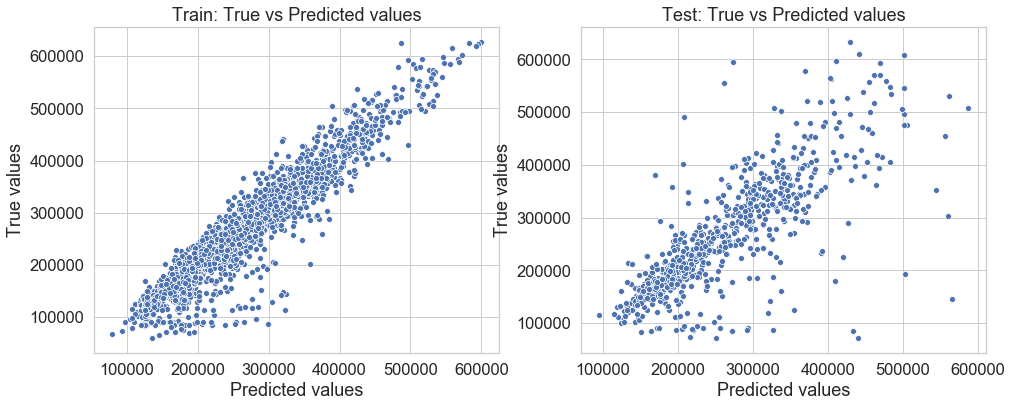

In [233]:
evaluate_preds(y_train_0, y_train_preds_0, y_test_0, y_test_preds_0)

#### Модель. Кластер 1

In [211]:
X_train_1 = X_train_ext.loc[X_train_ext['clusters_3_1'] == 1].copy()
y_train_1 = y_train_ext.loc[y_train_ext['clusters_3_1'] == 1].copy()['Price']

X_train_1.drop(['clusters_3_0', 'clusters_3_1', 'clusters_3_2'], axis=1, inplace=True)

X_test_1 = X_test_ext.loc[X_test_ext['clusters_3_1'] == 1].copy()
y_test_1 = y_test_ext.loc[y_test_ext['clusters_3_1'] == 1].copy()['Price']

X_test_1.drop(['clusters_3_0', 'clusters_3_1', 'clusters_3_2'], axis=1, inplace=True)

X_train_1.shape, y_train_1.shape, X_test_1.shape, y_test_1.shape

((2951, 26), (2951,), (1010, 26), (1010,))

In [212]:
from sklearn.model_selection import  GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [213]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          '\tMAE = ' + str(round(mean_absolute_error(true_values_train, pred_values_train), 3)) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) +
          '\tMAE = ' + str(round(mean_absolute_error(true_values_test, pred_values_test), 3))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train, y=true_values_train)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test, y=true_values_test)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

In [228]:
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
gbr.fit(X_train_1, y_train_1)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [229]:
y_train_preds_1 = gbr.predict(X_train_1)
y_test_preds_1 = gbr.predict(X_test_1)

Train:	R2 = 0.89	MAE = 19143.103
Test:	R2 = 0.689	MAE = 28916.146


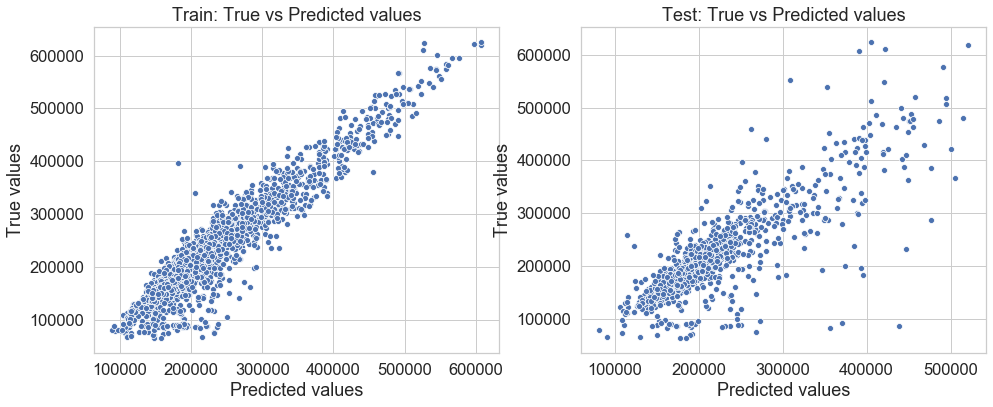

In [230]:
evaluate_preds(y_train_1, y_train_preds_1, y_test_1, y_test_preds_1)

#### Модель. Кластер 2

In [218]:
X_train_2 = X_train_ext.loc[X_train_ext['clusters_3_2'] == 1].copy()
y_train_2 = y_train_ext.loc[y_train_ext['clusters_3_2'] == 1].copy()['Price']

X_train_2.drop(['clusters_3_0', 'clusters_3_1', 'clusters_3_2'], axis=1, inplace=True)

X_test_2 = X_test_ext.loc[X_test_ext['clusters_3_2'] == 1].copy()
y_test_2 = y_test_ext.loc[y_test_ext['clusters_3_2'] == 1].copy()['Price']

X_test_2.drop(['clusters_3_0', 'clusters_3_1', 'clusters_3_2'], axis=1, inplace=True)

X_train_2.shape, y_train_2.shape, X_test_2.shape, y_test_2.shape

((2169, 26), (2169,), (707, 26), (707,))

In [219]:
from sklearn.model_selection import  GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [220]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          '\tMAE = ' + str(round(mean_absolute_error(true_values_train, pred_values_train), 3)) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) +
          '\tMAE = ' + str(round(mean_absolute_error(true_values_test, pred_values_test), 3))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train, y=true_values_train)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test, y=true_values_test)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

In [225]:
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
gbr.fit(X_train_2, y_train_2)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [226]:
y_train_preds_2 = gbr.predict(X_train_2)
y_test_preds_2 = gbr.predict(X_test_2)

Train:	R2 = 0.937	MAE = 9688.775
Test:	R2 = 0.765	MAE = 14809.148


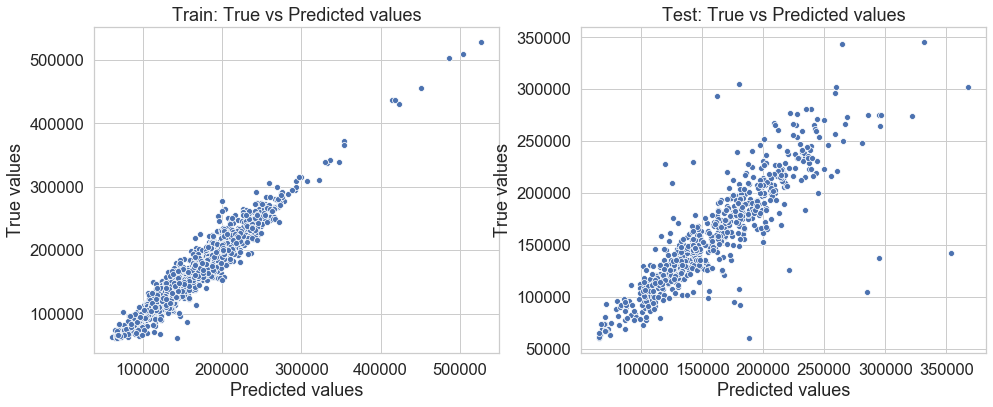

In [227]:
evaluate_preds(y_train_2, y_train_preds_2, y_test_2, y_test_preds_2)

In [235]:
X_train_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2380 entries, 15429 to 2135
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rooms                         2380 non-null   float64
 1   Square                        2380 non-null   float64
 2   LifeSquare                    2380 non-null   float64
 3   KitchenSquare                 2380 non-null   float64
 4   Floor                         2380 non-null   float64
 5   HouseFloor                    2380 non-null   float64
 6   HouseYear                     2380 non-null   float64
 7   Ecology_1                     2380 non-null   float64
 8   Ecology_2                     2380 non-null   float64
 9   Ecology_3                     2380 non-null   float64
 10  Social_1                      2380 non-null   float64
 11  Social_2                      2380 non-null   float64
 12  Social_3                      2380 non-null   float64
 13 

### Catboost

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
cat_features_idx = ['DistrictId', 'Floor', 'HouseFloor']

train_df[cat_features_idx] = train_df[cat_features_idx].astype('str')
train_df[cat_features_idx] = train_df[cat_features_idx].astype('str')

In [88]:
X = train_df[feature_names]
y = train_df[target_name]

X_test = test_df[feature_names]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 22), (3000, 22), (7000, 1), (3000, 1))

In [90]:
from catboost import CatBoostRegressor

In [91]:
ctb = CatBoostRegressor(random_seed=17)

In [92]:
%%time
ctb.fit(X_train, y_train,
        cat_features=cat_features_idx)

Learning rate set to 0.055186
0:	learn: 89958.6947022	total: 91.8ms	remaining: 1m 31s
1:	learn: 87276.7428338	total: 180ms	remaining: 1m 29s
2:	learn: 84631.1207183	total: 264ms	remaining: 1m 27s
3:	learn: 82291.6266321	total: 343ms	remaining: 1m 25s
4:	learn: 80103.2733429	total: 412ms	remaining: 1m 21s
5:	learn: 77995.5814496	total: 512ms	remaining: 1m 24s
6:	learn: 76123.9991136	total: 573ms	remaining: 1m 21s
7:	learn: 74343.4322888	total: 631ms	remaining: 1m 18s
8:	learn: 72670.9568189	total: 699ms	remaining: 1m 16s
9:	learn: 71163.3509930	total: 777ms	remaining: 1m 16s
10:	learn: 69753.3398890	total: 851ms	remaining: 1m 16s
11:	learn: 68432.7577663	total: 929ms	remaining: 1m 16s
12:	learn: 67251.5153871	total: 996ms	remaining: 1m 15s
13:	learn: 66179.5037593	total: 1.09s	remaining: 1m 16s
14:	learn: 65084.3484977	total: 1.15s	remaining: 1m 15s
15:	learn: 64112.5311152	total: 1.23s	remaining: 1m 15s
16:	learn: 63081.8988400	total: 1.29s	remaining: 1m 14s
17:	learn: 62239.2701021	to

152:	learn: 44603.7844605	total: 6.86s	remaining: 38s
153:	learn: 44574.8264188	total: 6.9s	remaining: 37.9s
154:	learn: 44549.3004927	total: 6.93s	remaining: 37.8s
155:	learn: 44515.4225621	total: 6.95s	remaining: 37.6s
156:	learn: 44469.0249442	total: 6.98s	remaining: 37.5s
157:	learn: 44423.8381215	total: 7s	remaining: 37.3s
158:	learn: 44377.0922819	total: 7.05s	remaining: 37.3s
159:	learn: 44351.1536639	total: 7.08s	remaining: 37.2s
160:	learn: 44338.5332082	total: 7.12s	remaining: 37.1s
161:	learn: 44271.2553862	total: 7.15s	remaining: 37s
162:	learn: 44254.8418426	total: 7.17s	remaining: 36.8s
163:	learn: 44222.8695506	total: 7.2s	remaining: 36.7s
164:	learn: 44197.6689509	total: 7.24s	remaining: 36.6s
165:	learn: 44170.8950156	total: 7.26s	remaining: 36.5s
166:	learn: 44145.5258076	total: 7.29s	remaining: 36.4s
167:	learn: 44121.5259199	total: 7.31s	remaining: 36.2s
168:	learn: 44067.5598774	total: 7.34s	remaining: 36.1s
169:	learn: 44039.7288400	total: 7.37s	remaining: 36s
170

306:	learn: 40358.0249194	total: 11s	remaining: 24.8s
307:	learn: 40329.6024545	total: 11s	remaining: 24.7s
308:	learn: 40295.3268483	total: 11s	remaining: 24.7s
309:	learn: 40285.6830392	total: 11.1s	remaining: 24.6s
310:	learn: 40258.9726290	total: 11.1s	remaining: 24.5s
311:	learn: 40236.2044169	total: 11.1s	remaining: 24.5s
312:	learn: 40200.8253139	total: 11.1s	remaining: 24.4s
313:	learn: 40170.2192344	total: 11.1s	remaining: 24.4s
314:	learn: 40168.0356092	total: 11.2s	remaining: 24.3s
315:	learn: 40153.0354354	total: 11.2s	remaining: 24.3s
316:	learn: 40133.8466294	total: 11.2s	remaining: 24.2s
317:	learn: 40103.6244427	total: 11.3s	remaining: 24.2s
318:	learn: 40079.5953278	total: 11.3s	remaining: 24.1s
319:	learn: 40057.8302595	total: 11.3s	remaining: 24s
320:	learn: 40044.2188170	total: 11.3s	remaining: 24s
321:	learn: 40022.8172762	total: 11.4s	remaining: 23.9s
322:	learn: 40000.2420751	total: 11.4s	remaining: 23.9s
323:	learn: 39967.4874803	total: 11.4s	remaining: 23.8s
32

458:	learn: 37689.4480569	total: 14.5s	remaining: 17s
459:	learn: 37682.7982252	total: 14.5s	remaining: 17s
460:	learn: 37676.1313025	total: 14.5s	remaining: 16.9s
461:	learn: 37651.2121865	total: 14.5s	remaining: 16.9s
462:	learn: 37633.1707791	total: 14.5s	remaining: 16.8s
463:	learn: 37613.4464322	total: 14.5s	remaining: 16.8s
464:	learn: 37592.0288071	total: 14.6s	remaining: 16.8s
465:	learn: 37583.4961762	total: 14.6s	remaining: 16.7s
466:	learn: 37576.0414090	total: 14.6s	remaining: 16.7s
467:	learn: 37546.1217972	total: 14.6s	remaining: 16.6s
468:	learn: 37520.2452160	total: 14.7s	remaining: 16.6s
469:	learn: 37501.1163194	total: 14.7s	remaining: 16.6s
470:	learn: 37462.2178184	total: 14.7s	remaining: 16.5s
471:	learn: 37427.3945294	total: 14.7s	remaining: 16.5s
472:	learn: 37392.8609564	total: 14.8s	remaining: 16.5s
473:	learn: 37349.5078039	total: 14.8s	remaining: 16.4s
474:	learn: 37332.3959514	total: 14.8s	remaining: 16.4s
475:	learn: 37322.7349828	total: 14.8s	remaining: 16

615:	learn: 35351.3649784	total: 17.6s	remaining: 11s
616:	learn: 35343.1484718	total: 17.6s	remaining: 11s
617:	learn: 35340.4576609	total: 17.7s	remaining: 10.9s
618:	learn: 35330.8295187	total: 17.7s	remaining: 10.9s
619:	learn: 35304.7680856	total: 17.7s	remaining: 10.8s
620:	learn: 35292.3030453	total: 17.7s	remaining: 10.8s
621:	learn: 35279.5825799	total: 17.7s	remaining: 10.8s
622:	learn: 35268.3061576	total: 17.7s	remaining: 10.7s
623:	learn: 35252.0554316	total: 17.8s	remaining: 10.7s
624:	learn: 35247.2819606	total: 17.8s	remaining: 10.7s
625:	learn: 35234.6955898	total: 17.8s	remaining: 10.6s
626:	learn: 35214.4517381	total: 17.8s	remaining: 10.6s
627:	learn: 35204.1029238	total: 17.9s	remaining: 10.6s
628:	learn: 35198.3389367	total: 17.9s	remaining: 10.5s
629:	learn: 35184.5981437	total: 17.9s	remaining: 10.5s
630:	learn: 35173.4004324	total: 17.9s	remaining: 10.5s
631:	learn: 35163.2542752	total: 18s	remaining: 10.5s
632:	learn: 35146.0339270	total: 18.1s	remaining: 10.5

764:	learn: 33742.6178919	total: 21.3s	remaining: 6.54s
765:	learn: 33724.1376421	total: 21.3s	remaining: 6.51s
766:	learn: 33714.1447605	total: 21.3s	remaining: 6.48s
767:	learn: 33694.7322227	total: 21.3s	remaining: 6.45s
768:	learn: 33693.1159131	total: 21.4s	remaining: 6.42s
769:	learn: 33676.6010644	total: 21.4s	remaining: 6.39s
770:	learn: 33657.7068809	total: 21.4s	remaining: 6.36s
771:	learn: 33655.2843461	total: 21.4s	remaining: 6.32s
772:	learn: 33651.1235544	total: 21.4s	remaining: 6.29s
773:	learn: 33639.8516786	total: 21.4s	remaining: 6.26s
774:	learn: 33634.3238747	total: 21.5s	remaining: 6.24s
775:	learn: 33633.2628090	total: 21.5s	remaining: 6.21s
776:	learn: 33624.6622557	total: 21.5s	remaining: 6.17s
777:	learn: 33613.1240706	total: 21.5s	remaining: 6.15s
778:	learn: 33601.8433053	total: 21.6s	remaining: 6.12s
779:	learn: 33595.4370909	total: 21.6s	remaining: 6.09s
780:	learn: 33589.1926328	total: 21.6s	remaining: 6.06s
781:	learn: 33581.1738786	total: 21.6s	remaining

913:	learn: 32198.4621125	total: 24.4s	remaining: 2.3s
914:	learn: 32195.6321203	total: 24.5s	remaining: 2.27s
915:	learn: 32193.4882609	total: 24.5s	remaining: 2.25s
916:	learn: 32190.3317813	total: 24.5s	remaining: 2.22s
917:	learn: 32180.8436627	total: 24.5s	remaining: 2.19s
918:	learn: 32169.4669743	total: 24.6s	remaining: 2.16s
919:	learn: 32167.7699865	total: 24.6s	remaining: 2.14s
920:	learn: 32161.2004214	total: 24.6s	remaining: 2.11s
921:	learn: 32141.7271062	total: 24.6s	remaining: 2.08s
922:	learn: 32122.9105530	total: 24.6s	remaining: 2.06s
923:	learn: 32110.8740840	total: 24.7s	remaining: 2.03s
924:	learn: 32094.0369451	total: 24.7s	remaining: 2s
925:	learn: 32087.8841470	total: 24.7s	remaining: 1.97s
926:	learn: 32078.4554372	total: 24.7s	remaining: 1.95s
927:	learn: 32071.9073283	total: 24.8s	remaining: 1.92s
928:	learn: 32056.1232953	total: 24.8s	remaining: 1.89s
929:	learn: 32039.3448126	total: 24.8s	remaining: 1.87s
930:	learn: 32038.0054655	total: 24.8s	remaining: 1.

Train:	R2 = 0.872	MAE = 21201.967
Test:	R2 = 0.742	MAE = 27512.09


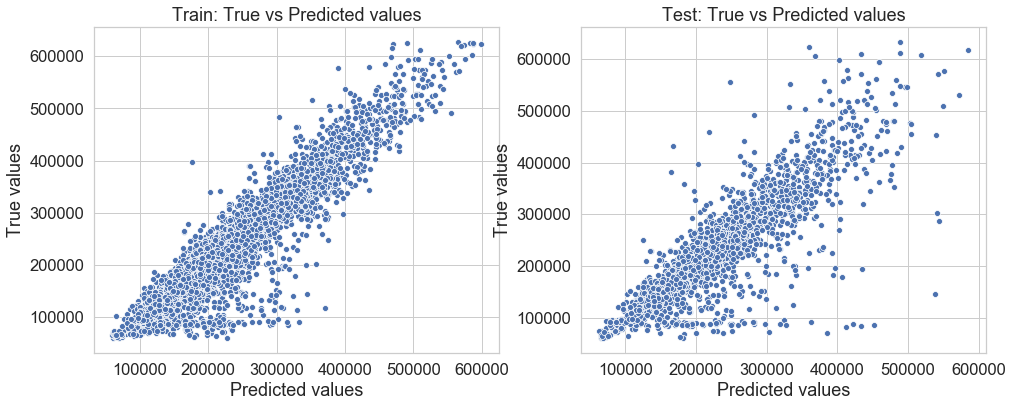

In [93]:
y_train_preds = ctb.predict(X_train)
y_test_preds = ctb.predict(X_test)

evaluate_preds(y_train['Price'], y_train_preds, y_test['Price'], y_test_preds)

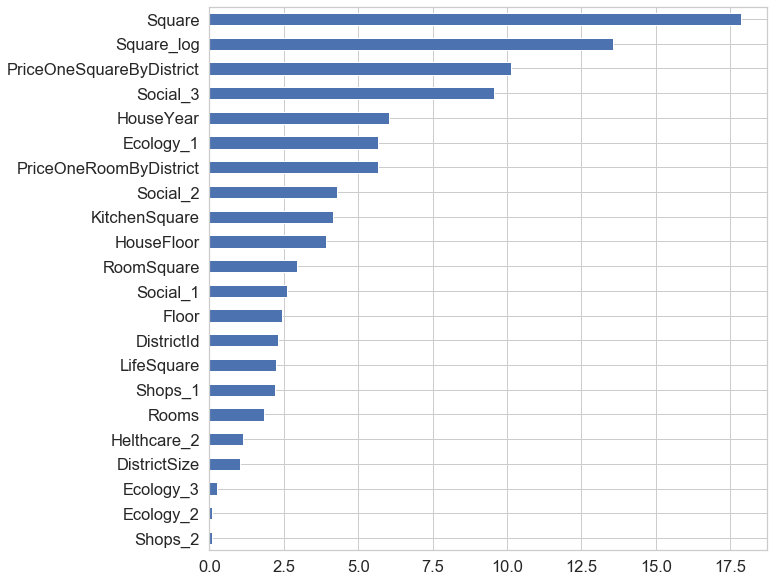

In [94]:
importances = ctb.feature_importances_
feat_importances = pd.Series(importances, index=X_train.columns)
feat_importances.sort_values(ascending=True, inplace=True)

feat_importances.plot(kind='barh', figsize=(10, 10));

### Catboost

In [79]:
from sklearn.model_selection import  GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

from sklearn.model_selection import train_test_split

In [74]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 5)) + 
          '\tMAE = ' + str(round(mean_absolute_error(true_values_train, pred_values_train), 5)) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 5)) +
          '\tMAE = ' + str(round(mean_absolute_error(true_values_test, pred_values_test), 5))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train, y=true_values_train)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test, y=true_values_test)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

In [75]:
from catboost import CatBoostRegressor

In [76]:
cat_features_idx = ['DistrictId', 'Floor', 'HouseFloor']

df_train[cat_features_idx] = df_train[cat_features_idx].astype('str')
df_test[cat_features_idx] = df_test[cat_features_idx].astype('str')

In [77]:
X = df_train.drop('Price', axis=1)
y = df_train['Price']

X.shape, y.shape

((10000, 40), (10000,))

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500, 40), (2500, 40), (7500,), (2500,))

In [90]:
ctb = CatBoostRegressor(random_seed=17, eval_metric='R2', silent=True, use_best_model=False)

In [82]:
%%time
ctb.fit(X_train, y_train,
        cat_features=cat_features_idx, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Wall time: 34.1 s


Train:	R2 = 0.88622	MAE = 20107.70594
Test:	R2 = 0.74181	MAE = 27142.90973


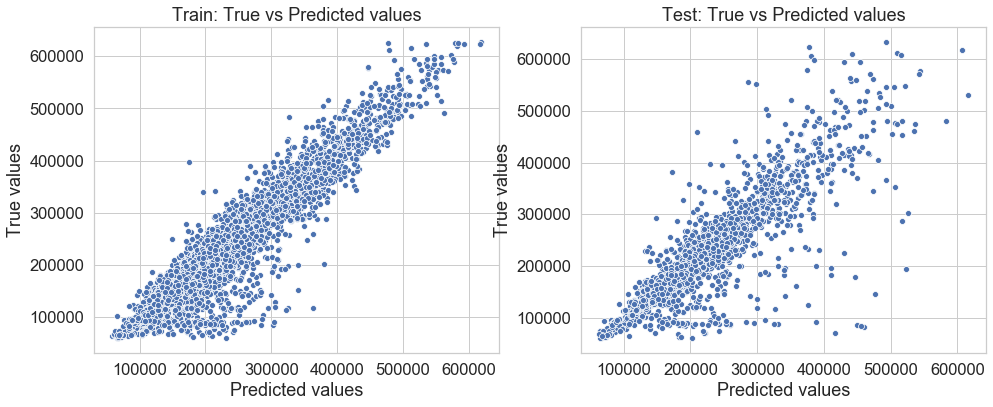

In [83]:
y_train_preds = ctb.predict(X_train)
y_test_preds = ctb.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

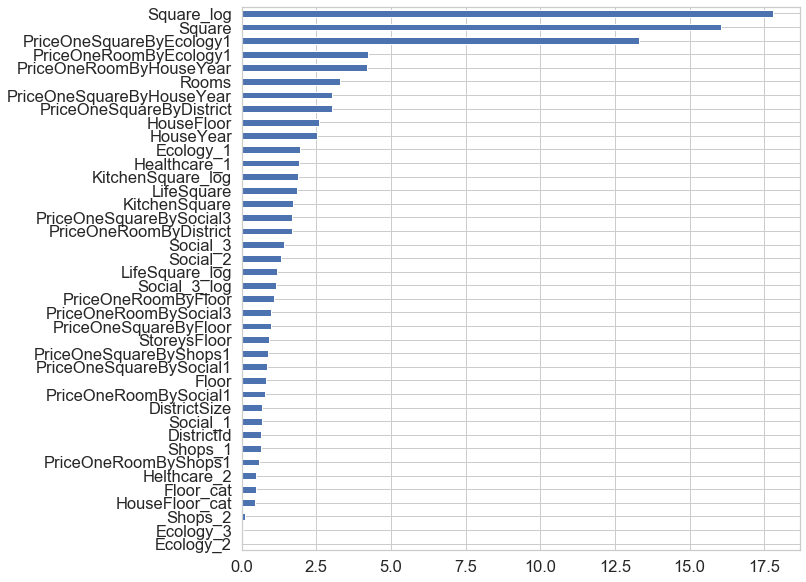

In [84]:
importances = ctb.feature_importances_
feat_importances = pd.Series(importances, index=X_train.columns)
feat_importances.sort_values(ascending=True, inplace=True)

feat_importances.plot(kind='barh', figsize=(10, 10));

In [94]:
cat_features_idx

['DistrictId', 'Floor', 'HouseFloor']

In [91]:
%%time
ctb.fit(X, y,
        cat_features=cat_features_idx)

Wall time: 38.2 s


In [99]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DistrictId                 5000 non-null   object 
 1   Rooms                      5000 non-null   float64
 2   Square                     5000 non-null   float64
 3   LifeSquare                 5000 non-null   float64
 4   KitchenSquare              5000 non-null   float64
 5   Floor                      5000 non-null   object 
 6   HouseFloor                 5000 non-null   object 
 7   HouseYear                  5000 non-null   int64  
 8   Ecology_1                  5000 non-null   float64
 9   Ecology_2                  5000 non-null   object 
 10  Ecology_3                  5000 non-null   object 
 11  Social_1                   5000 non-null   int64  
 12  Social_2                   5000 non-null   int64  
 13  Social_3                   5000 non-null   in

In [100]:
feature_bin_names = ['Ecology_2', 'Ecology_3', 'Shops_2']

df_test[feature_bin_names] = df_test[feature_bin_names].replace({'A':1, 'B':0})

In [101]:
y_pred = ctb.predict(df_test)

preds = pd.DataFrame()
preds['Id'] = df_test.index
preds['Price'] = y_pred

In [102]:
preds.to_csv('submission.csv', index=False)